In [ ]:
# Installation de l'environnement  
! sudo apt-get update
! sudo mkdir -p /usr/share/man/man1
! sudo apt-get install -y openjdk-11-jdk
! pip install --upgrade pip
! pip install pandas
! pip install pyspark

Get:1 http://security.debian.org/debian-security buster/updates InRelease [65.4 kB]
Get:2 http://deb.debian.org/debian buster InRelease [121 kB]
Get:3 http://deb.debian.org/debian buster-updates InRelease [51.9 kB]
Get:4 http://security.debian.org/debian-security buster/updates/main amd64 Packages [271 kB]
Get:5 http://deb.debian.org/debian buster/main amd64 Packages [7,907 kB]
Get:6 http://deb.debian.org/debian buster-updates/main amd64 Packages [9,504 B]
Fetched 8,426 kB in 2s (5,501 kB/s)




The following additional packages will be installed:
  at-spi2-core ca-certificates-java dbus dbus-user-session
  dconf-gsettings-backend dconf-service dmsetup fonts-dejavu-extra
  glib-networking glib-networking-common glib-networking-services
  gsettings-desktop-schemas java-common libapparmor1 libargon2-1 libasound2
  libasound2-data libatk-bridge2.0-0 libatk-wrapper-java
  libatk-wrapper-java-jni libatspi2.0-0 libcap2 libcolord2 libcryptsetup12
  libdconf1 libdevmapper1.02.1 libdrm-amdgpu1 

In [2]:
# Importation des bibliothèques à utiliser
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import pandas as pd
import matplotlib.pyplot as plt

# create SparkSession
spark = SparkSession.builder.master("local[*]") \
                    .appName('SparkSNCF') \
                    .getOrCreate()

# extract SparkContext
sc = spark.sparkContext

print('Spark CPU usage :', sc.defaultParallelism)

Spark CPU usage : 2


In [10]:
#Importation et visualisation du dataFram2009

from pyspark.sql.types import StructType,StructField, StringType, IntegerType, DoubleType
schema = StructType() \
      .add("Departement",StringType(),True) \
      .add("Nombre de déclarants",StringType(),True) \
      .add("Rouge/Rosé",DoubleType(),True) \
      .add("Blanc",DoubleType(),True) \
      .add("TOTAL",DoubleType(),True)
df_2009 = spark.read.option("header","true").schema(schema).option("delimiter", ";").csv("Relevé des volumes des stocks de vins déclarés par les viticulteurs (2009 2010).csv")
df_2009.show()
df_2009.printSchema()

+--------------------+--------------------+----------+---------+---------+
|         Departement|Nombre de déclarants|Rouge/Rosé|    Blanc|    TOTAL|
+--------------------+--------------------+----------+---------+---------+
|                 Ain|                 711|   18528.0|  43249.0|  61777.0|
|               Aisne|                 456|     198.0| 651652.0| 651850.0|
|              Allier|                 225|   27763.0|  36141.0|  63904.0|
|Alpes De Haute-Pr...|                  17|   29351.0|  30676.0|  60027.0|
|        Hautes Alpes|                  40|    3498.0|   4400.0|   7898.0|
|     Alpes Maritimes|                  19|    1801.0|   3538.0|   5339.0|
|             Ardeche|                 427|  353607.0| 399251.0| 752858.0|
|            Ardennes|                   2|      20.0|     22.0|     42.0|
|              Ariege|                  27|     908.0|    752.0|   1660.0|
|                Aube|               1 387|    6323.0|1401572.0|1407895.0|
|                Aude|   

In [9]:
#Importation et visualisation du dataFram2011

from pyspark.sql.types import StructType,StructField, StringType, IntegerType, DoubleType
schema = StructType() \
      .add("Departement",StringType(),True) \
      .add("Nombre de déclarants",StringType(),True) \
      .add("Rouge/Rosé",StringType(),True) \
      .add("Blanc",StringType(),True) \
      .add("TOTAL",StringType(),True)
df_2011 = spark.read.option("header","true").schema(schema).option("delimiter", ";").csv("Relevé des volumes des stocks de vins déclarés par les viticulteurs (2011 2012).csv")
df_2011.show()
df_2011.printSchema()

+--------------------+--------------------+----------+-------+-------+
|         Departement|Nombre de déclarants|Rouge/Rosé|  Blanc|  TOTAL|
+--------------------+--------------------+----------+-------+-------+
|                 Ain|                 606|   3641,58| 10 965| 14 606|
|               Aisne|                 524|    183,79|     21|    205|
|              Allier|                 257|    775,13|  1 470|  2 245|
|Alpes De Haute-Pr...|                  15|     88,02|  1 576|  1 664|
|        Hautes Alpes|                   9|     85,37|     57|    142|
|     Alpes Maritimes|                  17|         0|     12|     12|
|            Ardosche|                 381|   4064,33| 61 615| 65 680|
|            Ardennes|                   6|      8,93|     12|     21|
|               Arige|                  14|         0|     24|     24|
|                Aube|               1 374|    569,44|    997|  1 566|
|                Aude|                 815|  52841,13|318 134|370 975|
|     

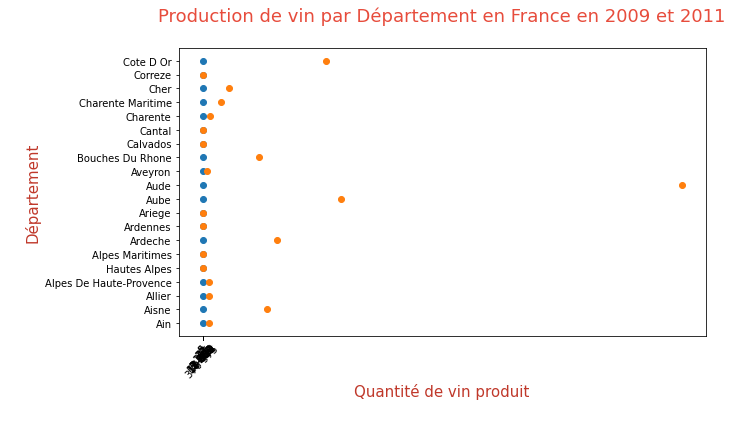

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_2009.createOrReplaceTempView("DATA_2009")
df_2011.createOrReplaceTempView("DATA_2011")

Req_data_2009 = spark.sql("SELECT * FROM DATA_2009")
Req_data_2011 = spark.sql("SELECT * FROM DATA_2011")

Departement_List = [(x["Departement"]) 
            for x in Req_data_2009.rdd.collect()]

Production_2009_List = [(x["TOTAL"]) 
            for x in Req_data_2009.rdd.collect()]

Production_2011_List = [(x["TOTAL"]) 
            for x in Req_data_2011.rdd.collect()]

plt.figure(figsize=(10,6))
#sns.scatterplot(x=Production_2009_List,y=Departement_List,palette='Reds_r')
plt.scatter(x=Production_2011_List,y=Departement_List)
plt.scatter(x=Production_2009_List,y=Departement_List)
plt.ylabel('\nDépartement', fontsize=15, color='#c0392b')
plt.xlabel("Quantité de vin produit\n", fontsize=15, color='#c0392b')
plt.title("Production de vin par Département en France en 2009 et 2011\n", fontsize=18, color='#e74c3c')
plt.xticks(rotation= 45)
plt.tight_layout()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aadf8a63-34d5-4fc9-8006-58d3e1062c05' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>